In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


## EDA

In [3]:
df.shape

(381109, 12)

In [4]:
df.describe(exclude=['category'])

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  str    
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  str    
 7   Vehicle_Damage        381109 non-null  str    
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), str(3)
memory usage: 34.9 MB


In [7]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Responses')

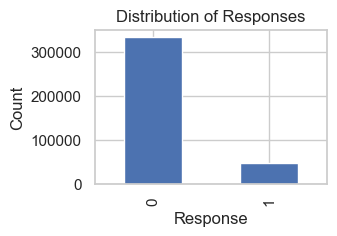

In [8]:
value_counts = df['Response'].value_counts()
plt.figure(figsize=(3,2))
value_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

<Axes: >

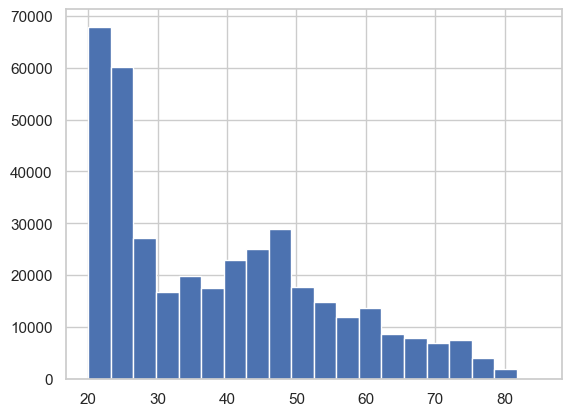

In [9]:
# Distribution of Age
df['Age'].hist(bins=20)

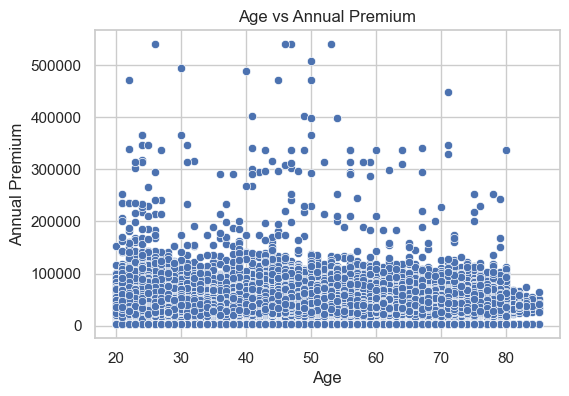

In [10]:
# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.title('Age vs Annual Premium')
plt.show()


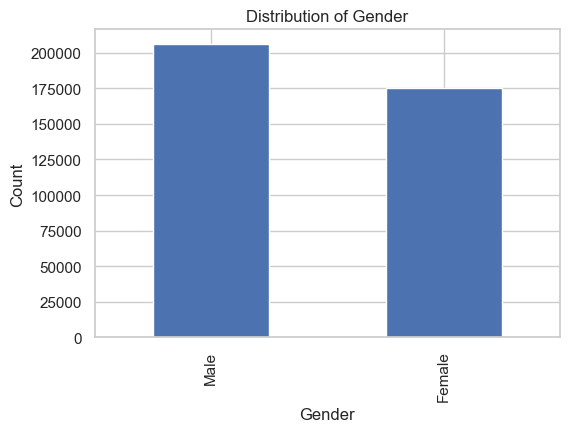

In [11]:
# Gender based Response distribution
value_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,4))
value_counts.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

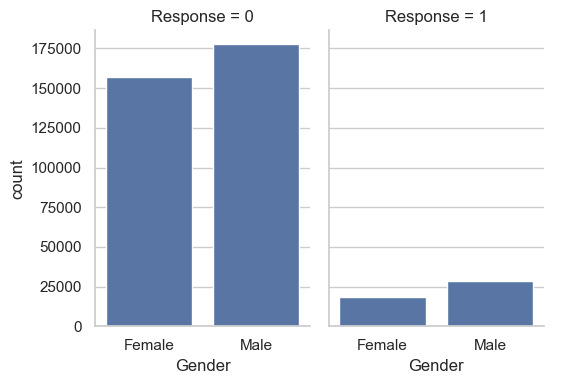

In [12]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
plotting = sns.catplot(x="Gender", y="count", col='Response', data=data, kind='bar',height=4, aspect=0.7)

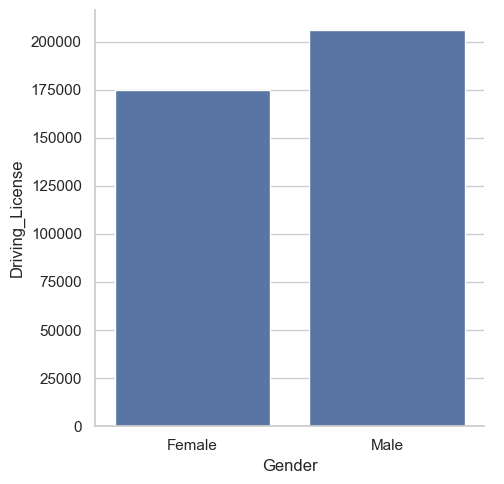

In [13]:
# Driving License by Gender
data = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind='bar')

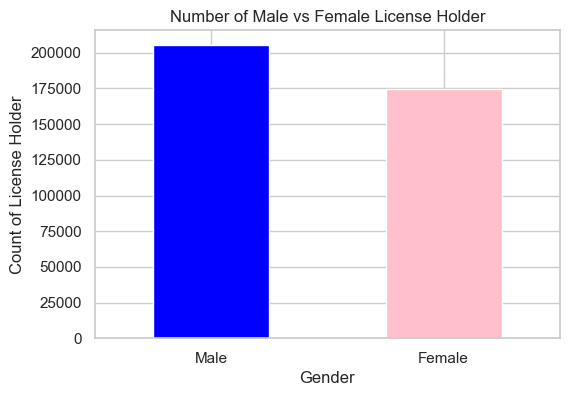

In [14]:
# Filter License holder based on gender
license_holder = df[df['Driving_License']==1]
gender_count = license_holder['Gender'].value_counts()
plt.figure(figsize=(6,4))
gender_count.plot(kind='bar', color=['blue','pink'])

plt.xlabel('Gender')
plt.ylabel('Count of License Holder')
plt.title('Number of Male vs Female License Holder')
plt.xticks(rotation=0)
plt.show()



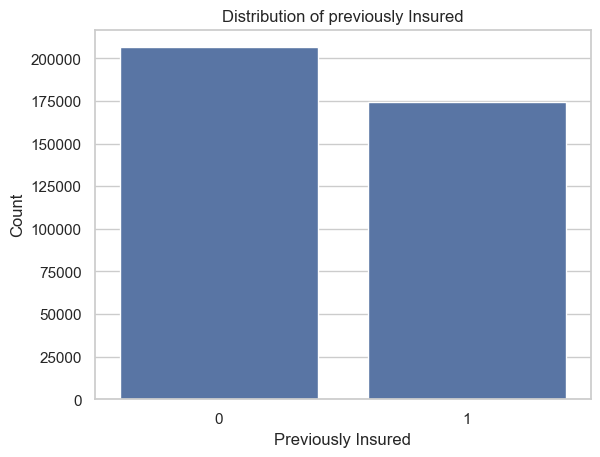

In [15]:
# Customer with Existing Insurance
sns.countplot(x='Previously_Insured', data=df)
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.title('Distribution of previously Insured')
plt.show()


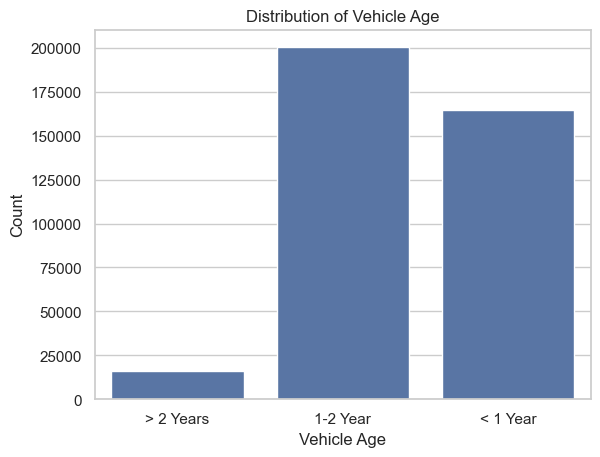

In [16]:
# Distribution of Vehicle age
sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.show()

In [17]:
# Response vs Vehicle age
data = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()
data

,Vehicle_Age,Response,Count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


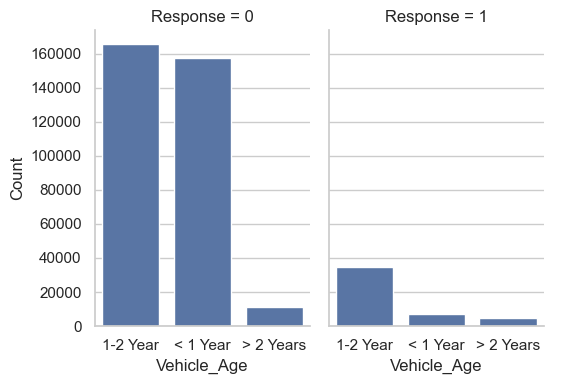

In [18]:
sns.catplot(x='Vehicle_Age', y='Count',col='Response',data=data,kind='bar',height=4, aspect=0.7)

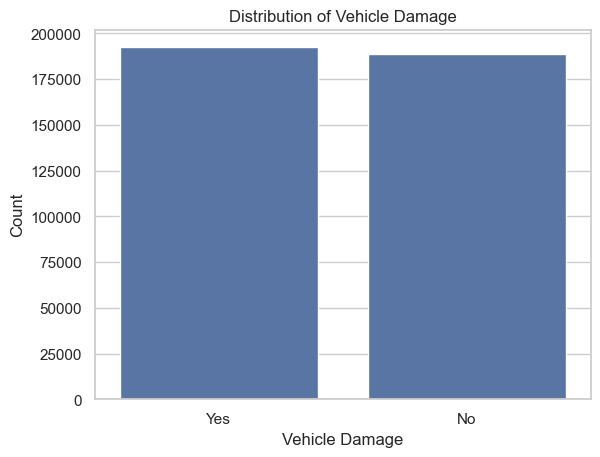

In [19]:
# Distribution of vehicle damage column
sns.countplot(data=df, x='Vehicle_Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Damage')
plt.show()

## Data Preprocessing

In [20]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  str    
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  str    
 7   Vehicle_Damage        381109 non-null  str    
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), str(3)
memory usage: 34.9 MB


In [21]:
num_feat = ['Age', 'Vintage']
cat_feat = ['Gender', 'Driving_License','Previously_Insured','Vehicle_Age_lt_1_year',
            'Vehicle_Age_gt_2_year','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [22]:
# Mapping Gender column to 0 & 1 values
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).astype(int)
df.head(2) 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [23]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

id: int64
Gender: int64
Age: int64
Driving_License: int64
Region_Code: float64
Previously_Insured: int64
Vehicle_Age: str
Vehicle_Damage: str
Annual_Premium: float64
Policy_Sales_Channel: float64
Vintage: int64
Response: int64


In [24]:
# Creating dummy columns for categorical features
df = pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [25]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

id: int64
Gender: int64
Age: int64
Driving_License: int64
Region_Code: float64
Previously_Insured: int64
Annual_Premium: float64
Policy_Sales_Channel: float64
Vintage: int64
Response: int64
Vehicle_Age_< 1 Year: bool
Vehicle_Age_> 2 Years: bool
Vehicle_Damage_Yes: bool


In [26]:
df = df.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_Age_lt_1_year', 'Vehicle_Age_> 2 Years':'Vehicle_Age_gt_2_year'})
df['Vehicle_Age_lt_1_year']= df['Vehicle_Age_lt_1_year'].astype('int')
df['Vehicle_Age_gt_2_year']= df['Vehicle_Age_gt_2_year'].astype('int')
df['Vehicle_Damage_Yes']= df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')


In [27]:
# Scaling the data
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])

mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

id = df.id
df = df.drop('id',axis=1)

In [28]:
# Train test Split
from sklearn.model_selection import train_test_split

train_target = df['Response']
train = df.drop(['Response'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(train,train_target,random_state=42)

In [29]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [30]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_year,Vehicle_Age_gt_2_year,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


## Model Trainer - Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {
    'n_estimators': [300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.3, 0.5]
}

clf = RandomForestClassifier(class_weight='balanced')
model = RandomizedSearchCV(estimator=clf, param_distributions=random_search,n_iter=10,
                           cv=4,verbose=1,random_state=42,n_jobs=-1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ht='balanced')
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used h

In [32]:
best_params = model.best_params_
print("Best Hyperparameter:")
print(best_params)

Best Hyperparameter:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 30, 'criterion': 'entropy'}


In [33]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     83513
           1       0.35      0.43      0.39     11765

    accuracy                           0.83     95278
   macro avg       0.63      0.66      0.64     95278
weighted avg       0.85      0.83      0.84     95278



## Model Trainer - Balanced Random Forest Classifier

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search_1 = {
    'n_estimators': [300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.3, 0.5]
}

clf_1 = BalancedRandomForestClassifier()
model_1 = RandomizedSearchCV(estimator=clf_1, param_distributions=random_search_1,n_iter=10,
                           cv=4,verbose=1,random_state=42,n_jobs=-1)
model_1.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",BalancedRando...stClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used h

In [35]:
best_params_1 = model_1.best_params_
print("Best Hyperparameter:")
print(best_params_1)

Best Hyperparameter:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 30, 'criterion': 'entropy'}


In [36]:
from sklearn.metrics import classification_report

y_pred_1 = model_1.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     83513
           1       0.31      0.86      0.45     11765

    accuracy                           0.74     95278
   macro avg       0.64      0.79      0.64     95278
weighted avg       0.89      0.74      0.78     95278



In [37]:
fsgfdvfv

NameError: name 'fsgfdvfv' is not defined

In [ ]:
# Save model
import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Loading back pickle file
rf_load = pickle.load(open(filename, 'rb'))